# Association Rule mining (ARM)

In [1]:
!pip install mlxtend

In [177]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [178]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
['Milk', 'Apple', 'Kidney Beans', 'Eggs'],

['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [218]:
dataset

len(dataset)

te = TransactionEncoder()

te_arry = te.fit(dataset).transform(dataset);

te_arry

te_arry

df = pd.DataFrame(te_arry,columns=te.columns_)

In [220]:
te.columns_ # Transcationencoder built in method are 

te.columns_mapping_ # built method for Transcationencoder columns_mappling 

frequent_itmests = apriori(df,min_support=0.6,use_colnames=True)
frequent_itmests

# frequent_itmests = apriori(df,min_support=0.4,use_colnames=True)
# frequent_itmests

# df.info()

In [221]:
from mlxtend.frequent_patterns import association_rules
a_r = association_rules(frequent_itmests,metric='support',min_threshold=0.7)

In [222]:
a_r

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.0,1.0,0.0,inf
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.8,1.0,0.0,1.0


In [194]:
rules = association_rules(frequent_itmests, metric="lift", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
1,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
2,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
3,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
4,(Eggs),"(Onion, Kidney Beans)",0.8,0.6,0.6,0.75,1.25,0.12,1.6
5,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf


In [195]:
# rules.set_index('antecedents')

In [196]:
# rules = rules[['consequents','support','confidence','lift','antecedents']]
# rules

rules = rules[['antecedents','consequents','support','confidence','lift']]
rules

,antecedents,consequents,support,confidence,lift
0,(Eggs),(Onion),0.6,0.75,1.25
1,(Onion),(Eggs),0.6,1.00,1.25
2,"(Eggs, Kidney Beans)",(Onion),0.6,0.75,1.25
3,"(Onion, Kidney Beans)",(Eggs),0.6,1.00,1.25
4,(Eggs),"(Onion, Kidney Beans)",0.6,0.75,1.25
5,(Onion),"(Eggs, Kidney Beans)",0.6,1.00,1.25


In [197]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))

E:\installation_files\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [139]:
rules

,antecedents,consequents,support,confidence,lift,antecedent_len
0,(Eggs),(Onion),0.6,0.75,1.25,1
1,(Onion),(Eggs),0.6,1.00,1.25,1
2,"(Eggs, Kidney Beans)",(Onion),0.6,0.75,1.25,2
3,"(Onion, Kidney Beans)",(Eggs),0.6,1.00,1.25,2
4,(Eggs),"(Onion, Kidney Beans)",0.6,0.75,1.25,1
5,(Onion),"(Eggs, Kidney Beans)",0.6,1.00,1.25,1


In [147]:
b = rules[ (rules['antecedent_len'] >= 2) &
(rules['confidence'] > 0.75) &
(rules['lift'] > 1.2) ]

In [148]:
b

,antecedents,consequents,support,confidence,lift,antecedent_len
3,"(Onion, Kidney Beans)",(Eggs),0.6,1.0,1.25,2


In [150]:
eggs_kbs = rules[rules['antecedents'] == {'Eggs', 'Kidney Beans'}]
eggs_kbs

,antecedents,consequents,support,confidence,lift,antecedent_len
2,"(Eggs, Kidney Beans)",(Onion),0.6,0.75,1.25,2


In [151]:
eggs_kbs = rules[rules['antecedents'] == {'Onion', 'Kidney Beans'}]
eggs_kbs

,antecedents,consequents,support,confidence,lift,antecedent_len
3,"(Onion, Kidney Beans)",(Eggs),0.6,1.0,1.25,2


In [152]:
res = rules
res = res[['antecedents', 'consequents', 'support']]
res

,antecedents,consequents,support
0,(Eggs),(Onion),0.6
1,(Onion),(Eggs),0.6
2,"(Eggs, Kidney Beans)",(Onion),0.6
3,"(Onion, Kidney Beans)",(Eggs),0.6
4,(Eggs),"(Onion, Kidney Beans)",0.6
5,(Onion),"(Eggs, Kidney Beans)",0.6


In [251]:
# grocery shop
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import association_rules,apriori

In [252]:
df = pd.read_csv('c:/Users/Hari/Desktop/datasets/Naresh_datasets/groceries_200.csv')

In [253]:
df

,citrus fruit,semi-finished bread,margarine,ready soups,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,beef,berries,root vegetables,whole milk,dessert,spread cheese,brown bread,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,canned beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,pork,beef,pip fruit,herbs,spices,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,frankfurter,citrus fruit,UHT-milk,margarine,sugar,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 23 columns):
citrus fruit           199 non-null object
semi-finished bread    150 non-null object
margarine              113 non-null object
ready soups            85 non-null object
Unnamed: 4             65 non-null object
Unnamed: 5             45 non-null object
Unnamed: 6             36 non-null object
Unnamed: 7             24 non-null object
Unnamed: 8             16 non-null object
Unnamed: 9             11 non-null object
Unnamed: 10            4 non-null object
Unnamed: 11            3 non-null object
Unnamed: 12            3 non-null object
Unnamed: 13            2 non-null object
Unnamed: 14            2 non-null object
Unnamed: 15            1 non-null object
Unnamed: 16            1 non-null object
Unnamed: 17            1 non-null object
Unnamed: 18            1 non-null object
Unnamed: 19            1 non-null object
Unnamed: 20            1 non-null object
Unnamed: 21          

In [255]:
df.isnull().sum()

citrus fruit             0
semi-finished bread     49
margarine               86
ready soups            114
Unnamed: 4             134
Unnamed: 5             154
Unnamed: 6             163
Unnamed: 7             175
Unnamed: 8             183
Unnamed: 9             188
Unnamed: 10            195
Unnamed: 11            196
Unnamed: 12            196
Unnamed: 13            197
Unnamed: 14            197
Unnamed: 15            198
Unnamed: 16            198
Unnamed: 17            198
Unnamed: 18            198
Unnamed: 19            198
Unnamed: 20            198
Unnamed: 21            198
Unnamed: 22            198
dtype: int64

In [256]:
df.columns

Index(['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [257]:
df.fillna(0,inplace=True)

In [258]:
df

,citrus fruit,semi-finished bread,margarine,ready soups,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,tropical fruit,yogurt,coffee,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,whole milk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,pip fruit,yogurt,cream cheese,meat spreads,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,other vegetables,whole milk,condensed milk,long life bakery product,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,whole milk,butter,yogurt,rice,abrasive cleaner,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,beef,berries,root vegetables,whole milk,dessert,spread cheese,brown bread,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,canned beer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,pork,beef,pip fruit,herbs,spices,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,frankfurter,citrus fruit,UHT-milk,margarine,sugar,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [259]:
df.isnull().sum()

citrus fruit           0
semi-finished bread    0
margarine              0
ready soups            0
Unnamed: 4             0
Unnamed: 5             0
Unnamed: 6             0
Unnamed: 7             0
Unnamed: 8             0
Unnamed: 9             0
Unnamed: 10            0
Unnamed: 11            0
Unnamed: 12            0
Unnamed: 13            0
Unnamed: 14            0
Unnamed: 15            0
Unnamed: 16            0
Unnamed: 17            0
Unnamed: 18            0
Unnamed: 19            0
Unnamed: 20            0
Unnamed: 21            0
Unnamed: 22            0
dtype: int64

In [260]:
arr = np.array(df.values)

In [261]:
len(arr)

199

In [262]:
all_items=np.unique(arr[~(arr==0)]);all_items

array(['Instant food products', 'UHT-milk', 'abrasive cleaner',
       'artif. sweetener', 'baking powder', 'bathroom cleaner', 'beef',
       'berries', 'beverages', 'bottled beer', 'bottled water', 'brandy',
       'brown bread', 'butter', 'butter milk', 'cake bar', 'candles',
       'candy', 'canned beer', 'canned fish', 'canned fruit',
       'canned vegetables', 'cat food', 'cereals', 'chewing gum',
       'chicken', 'chocolate', 'chocolate marshmallow', 'citrus fruit',
       'cling film/bags', 'cocoa drinks', 'coffee', 'condensed milk',
       'cream cheese', 'curd', 'curd cheese', 'dental care', 'dessert',
       'detergent', 'dishes', 'dog food', 'domestic eggs',
       'finished products', 'fish', 'flour', 'flower (seeds)',
       'flower soil/fertilizer', 'frankfurter', 'frozen dessert',
       'frozen fish', 'frozen meals', 'frozen potato products',
       'frozen vegetables', 'fruit/vegetable juice', 'grapes', 'ham',
       'hamburger meat', 'hard cheese', 'herbs', 'honey'

In [263]:
len(all_items)

117

In [264]:
basket = pd.DataFrame(0,index=np.arange(len(arr)),columns=all_items)

In [271]:
basket.values == 0

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [238]:
# for col in df.columns: # columnwise
#     t_f = (df[col].values!=0)#
#     itms = df.iloc[t_f,col]# all the elements which are not zero in col
# #|| first element of every basket
#     indx = itms.index # save the index of above elements
#     for i in range(len(itms)):
#         basket.loc[indx[i]][itms.iloc[i]] += 1

In [272]:
len((df[col].values!=0))


199

In [273]:
col

'Unnamed: 22'

In [274]:
for col in df.columns: # columnwise
    t_f = (df[col].values!=0)#
    itms = df.loc[t_f,col]# all the elements which are not zero in col
#|| first element of every basket
    indx = itms.index # save the index of above elements
    for i in range(len(itms)):
        basket.loc[indx[i]][itms.iloc[i]] += 1

In [275]:
basket

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,sweet spreads,tropical fruit,turkey,waffles,whipped/sour cream,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [276]:
# df.transpose()

In [277]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [278]:
# df.replace(to_replace=[range(1,10)],value=1)

In [279]:
frequent_itemset = apriori(basket,min_support=0.02,use_colnames=True)

In [280]:
frequent_itemset

,support,itemsets
0,0.020101,(UHT-milk)
1,0.040201,(beef)
2,0.055276,(berries)
3,0.025126,(beverages)
4,0.065327,(bottled beer)
...,...,...
125,0.020101,"(rolls/buns, whole milk, frozen vegetables)"
126,0.020101,"(other vegetables, whole milk, ham)"
127,0.020101,"(other vegetables, whole milk, root vegetables)"
128,0.020101,"(whole milk, other vegetables, sugar)"


In [282]:
frequent_itemset.head()

,support,itemsets
0,0.020101,(UHT-milk)
1,0.040201,(beef)
2,0.055276,(berries)
3,0.025126,(beverages)
4,0.065327,(bottled beer)


In [283]:
frequent_itemset.tail()

,support,itemsets
125,0.020101,"(rolls/buns, whole milk, frozen vegetables)"
126,0.020101,"(other vegetables, whole milk, ham)"
127,0.020101,"(other vegetables, whole milk, root vegetables)"
128,0.020101,"(whole milk, other vegetables, sugar)"
129,0.020101,"(tropical fruit, yogurt, whole milk)"


In [284]:
frequent_itemset['lenght'] = frequent_itemset['itemsets'].apply(lambda x: len(x))

In [286]:
frequent_itemset['lenght'].max()

3

In [287]:
frequent_itemset['lenght'].min()

1

In [289]:
rules = association_rules(frequent_itemset,metric="lift", min_threshold=1)

In [290]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(fruit/vegetable juice),(bottled beer),0.075377,0.065327,0.025126,0.333333,5.102564,0.020202,1.402010
1,(bottled beer),(fruit/vegetable juice),0.065327,0.075377,0.025126,0.384615,5.102564,0.020202,1.502513
2,(other vegetables),(bottled beer),0.185930,0.065327,0.030151,0.162162,2.482328,0.018005,1.115578
3,(bottled beer),(other vegetables),0.065327,0.185930,0.030151,0.461538,2.482328,0.018005,1.511845
4,(whole milk),(bottled beer),0.266332,0.065327,0.025126,0.094340,1.444122,0.007727,1.032035
...,...,...,...,...,...,...,...,...,...
159,"(tropical fruit, whole milk)",(yogurt),0.045226,0.110553,0.020101,0.444444,4.020202,0.015101,1.601005
160,"(yogurt, whole milk)",(tropical fruit),0.055276,0.105528,0.020101,0.363636,3.445887,0.014267,1.405599
161,(tropical fruit),"(yogurt, whole milk)",0.105528,0.055276,0.020101,0.190476,3.445887,0.014267,1.167012
162,(yogurt),"(tropical fruit, whole milk)",0.110553,0.045226,0.020101,0.181818,4.020202,0.015101,1.166946


In [293]:
rules = association_rules(frequent_itemset,metric="confidence", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(cereals),(whole milk),0.020101,0.266332,0.020101,1.0,3.754717,0.014747,inf
1,"(rolls/buns, frozen vegetables)",(whole milk),0.020101,0.266332,0.020101,1.0,3.754717,0.014747,inf
2,"(other vegetables, ham)",(whole milk),0.020101,0.266332,0.020101,1.0,3.754717,0.014747,inf
3,"(other vegetables, sugar)",(whole milk),0.020101,0.266332,0.020101,1.0,3.754717,0.014747,inf


In [297]:
rules = association_rules(frequent_itemset,metric="support", min_threshold=5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [299]:
rules = association_rules(frequent_itemset,metric="lift", min_threshold=5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(fruit/vegetable juice),(bottled beer),0.075377,0.065327,0.025126,0.333333,5.102564,0.020202,1.402010
1,(bottled beer),(fruit/vegetable juice),0.065327,0.075377,0.025126,0.384615,5.102564,0.020202,1.502513
2,(domestic eggs),(fruit/vegetable juice),0.035176,0.075377,0.020101,0.571429,7.580952,0.017449,2.157454
3,(fruit/vegetable juice),(domestic eggs),0.075377,0.035176,0.020101,0.266667,7.580952,0.017449,1.315669
4,(tropical fruit),(domestic eggs),0.105528,0.035176,0.020101,0.190476,5.414966,0.016388,1.191842
5,(domestic eggs),(tropical fruit),0.035176,0.105528,0.020101,0.571429,5.414966,0.016388,2.087102
6,(frankfurter),(sugar),0.080402,0.060302,0.025126,0.312500,5.182292,0.020277,1.366834
7,(sugar),(frankfurter),0.060302,0.080402,0.025126,0.416667,5.182292,0.020277,1.576454
8,(tropical fruit),(pip fruit),0.105528,0.035176,0.020101,0.190476,5.414966,0.016388,1.191842
9,(pip fruit),(tropical fruit),0.035176,0.105528,0.020101,0.571429,5.414966,0.016388,2.087102


In [301]:
rules = association_rules(frequent_itemset,metric="lift", min_threshold=1)
rules[rules['confidence']>=0.7]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(cereals),(whole milk),0.020101,0.266332,0.020101,1.000000,3.754717,0.014747,inf
40,(domestic eggs),(whole milk),0.035176,0.266332,0.030151,0.857143,3.218329,0.020782,5.135678
57,(frozen vegetables),(whole milk),0.055276,0.266332,0.040201,0.727273,2.730703,0.025479,2.690117
67,(ham),(whole milk),0.030151,0.266332,0.025126,0.833333,3.128931,0.017096,4.402010
123,"(fruit/vegetable juice, bottled beer)",(whole milk),0.025126,0.266332,0.020101,0.800000,3.003774,0.013409,3.668342
124,"(whole milk, bottled beer)",(fruit/vegetable juice),0.025126,0.075377,0.020101,0.800000,10.613333,0.018207,4.623116
129,"(other vegetables, frozen vegetables)",(whole milk),0.025126,0.266332,0.020101,0.800000,3.003774,0.013409,3.668342
135,"(rolls/buns, frozen vegetables)",(whole milk),0.020101,0.266332,0.020101,1.000000,3.754717,0.014747,inf
141,"(other vegetables, ham)",(whole milk),0.020101,0.266332,0.020101,1.000000,3.754717,0.014747,inf
142,"(whole milk, ham)",(other vegetables),0.025126,0.185930,0.020101,0.800000,4.302703,0.015429,4.070352


In [302]:
rules = association_rules(frequent_itemset,metric="confidence", min_threshold=0.5)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(butter),(whole milk),0.045226,0.266332,0.025126,0.555556,2.085954,0.013080,1.650754
1,(cereals),(whole milk),0.020101,0.266332,0.020101,1.000000,3.754717,0.014747,inf
2,(domestic eggs),(fruit/vegetable juice),0.035176,0.075377,0.020101,0.571429,7.580952,0.017449,2.157454
3,(domestic eggs),(tropical fruit),0.035176,0.105528,0.020101,0.571429,5.414966,0.016388,2.087102
4,(domestic eggs),(whole milk),0.035176,0.266332,0.030151,0.857143,3.218329,0.020782,5.135678


In [304]:
rules = association_rules(frequent_itemset, min_threshold=0.5)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(butter),(whole milk),0.045226,0.266332,0.025126,0.555556,2.085954,0.013080,1.650754
1,(cereals),(whole milk),0.020101,0.266332,0.020101,1.000000,3.754717,0.014747,inf
2,(domestic eggs),(fruit/vegetable juice),0.035176,0.075377,0.020101,0.571429,7.580952,0.017449,2.157454
3,(domestic eggs),(tropical fruit),0.035176,0.105528,0.020101,0.571429,5.414966,0.016388,2.087102
4,(domestic eggs),(whole milk),0.035176,0.266332,0.030151,0.857143,3.218329,0.020782,5.135678


In [306]:
rules = association_rules(frequent_itemset, min_threshold=2.0)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [308]:
rules = association_rules(frequent_itemset,metric="support", min_threshold=0.01)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(fruit/vegetable juice),(bottled beer),0.075377,0.065327,0.025126,0.333333,5.102564,0.020202,1.402010
1,(bottled beer),(fruit/vegetable juice),0.065327,0.075377,0.025126,0.384615,5.102564,0.020202,1.502513
2,(other vegetables),(bottled beer),0.185930,0.065327,0.030151,0.162162,2.482328,0.018005,1.115578
3,(bottled beer),(other vegetables),0.065327,0.185930,0.030151,0.461538,2.482328,0.018005,1.511845
4,(whole milk),(bottled beer),0.266332,0.065327,0.025126,0.094340,1.444122,0.007727,1.032035


In [309]:
import pandas as pd
dict = {'itemsets': [['177', '176'], ['177', '179'],
['176', '178'], ['176', '179'],
['93', '100'], ['177', '178'],
['177', '176', '178']],
'support':[0.253623, 0.253623, 0.217391,
0.217391, 0.181159, 0.108696, 0.108696]}

freq_itemsets = pd.DataFrame(dict)
freq_itemsets

,itemsets,support
0,"[177, 176]",0.253623
1,"[177, 179]",0.253623
2,"[176, 178]",0.217391
3,"[176, 179]",0.217391
4,"[93, 100]",0.181159
5,"[177, 178]",0.108696
6,"[177, 176, 178]",0.108696


In [310]:
from mlxtend.frequent_patterns import association_rules
res = association_rules(freq_itemsets, support_only=True, min_threshold=0.1)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(176),(177),NaN,NaN,0.253623,NaN,NaN,NaN,NaN
1,(177),(176),NaN,NaN,0.253623,NaN,NaN,NaN,NaN
2,(179),(177),NaN,NaN,0.253623,NaN,NaN,NaN,NaN
3,(177),(179),NaN,NaN,0.253623,NaN,NaN,NaN,NaN
4,(176),(178),NaN,NaN,0.217391,NaN,NaN,NaN,NaN
5,(178),(176),NaN,NaN,0.217391,NaN,NaN,NaN,NaN
6,(176),(179),NaN,NaN,0.217391,NaN,NaN,NaN,NaN
7,(179),(176),NaN,NaN,0.217391,NaN,NaN,NaN,NaN
8,(100),(93),NaN,NaN,0.181159,NaN,NaN,NaN,NaN
9,(93),(100),NaN,NaN,0.181159,NaN,NaN,NaN,NaN


In [367]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [368]:
dataset = pd.read_csv('c:/Users/Hari/Desktop/datasets/Naresh_datasets/VC_Startups.csv')

In [369]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [370]:
X = dataset.iloc[:,-1].values;

In [371]:
y = dataset.iloc[:,4]

In [372]:
x = dataset.iloc[:,0].values;x

array([165349.2 , 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 114523.61,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05,      0.  ])

No handles with labels found to put in legend.


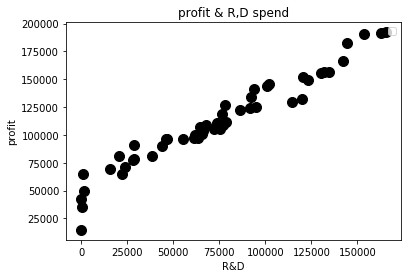

In [373]:
plt.scatter(x,y,label='',color='k',s=100)
plt.xlabel('R&D')
plt.ylabel('profit')
plt.title('profit & R,D spend')
plt.time
plt.legend()
plt.show()

No handles with labels found to put in legend.


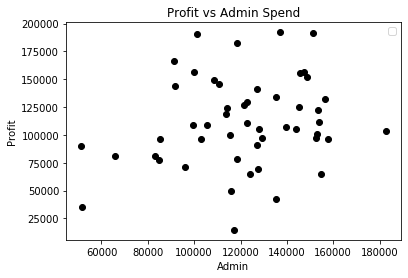

In [374]:
x = dataset.iloc[:, 1].values
plt.scatter(x,y,label='',color='k')
plt.xlabel('Admin')
plt.ylabel('Profit')
plt.title('Profit vs Admin Spend')
plt.legend()
plt.show()


No handles with labels found to put in legend.


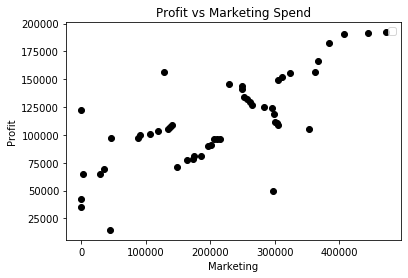

In [375]:
x = dataset.iloc[:, 2].values
plt.scatter(x,y,label='',color='k')
plt.xlabel('Marketing')
plt.ylabel('Profit')
plt.title('Profit vs Marketing Spend')
plt.legend()
plt.show()

No handles with labels found to put in legend.


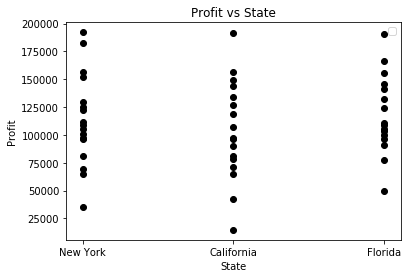

In [376]:
x = dataset.iloc[:, 3].values
plt.scatter(x,y,label='',color='k')
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Profit vs State')
plt.legend()
plt.show()


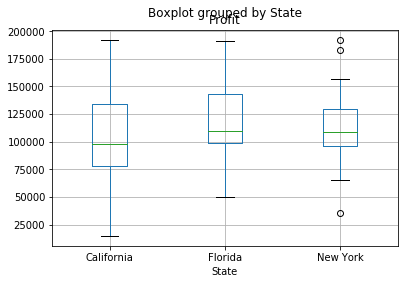

In [377]:
df = dataset.iloc[:, 3:5]
df.boxplot(column='Profit',by='State')

In [378]:
type(df)

pandas.core.frame.DataFrame

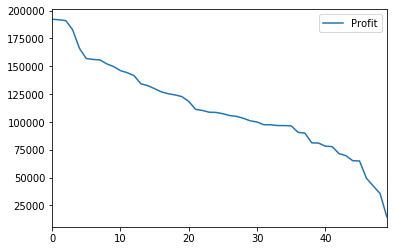

In [379]:
df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA92EF2B88>]],
      dtype=object)

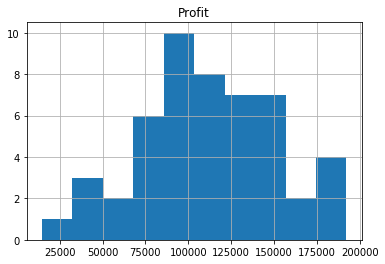

In [380]:
df.hist()

In [381]:
X = dataset.iloc[:, :-1].values
X

y = dataset.iloc[:, 4].values
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [382]:
dataset.groupby(by=['State']).sum()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,1099180.46,2052690.62,3103195.80,1766387.98
Florida,1291584.26,1948302.36,3957176.82,1900384.39
New York,1295316.06,2066239.00,3490882.27,1933859.59


In [383]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
lb = LabelEncoder()
ohe = OneHotEncoder()

In [384]:
state_n = pd.get_dummies(dataset['State'])

In [385]:
dataset=pd.concat([dataset,state_n],1);dataset.head(1)

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.2,136897.8,471784.1,New York,192261.83,0,0,1


In [391]:
y = dataset['Profit']

In [392]:
X = dataset.drop(['State','Profit','California'],1);X

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0
5,131876.90,99814.71,362861.36,0,1
6,134615.46,147198.87,127716.82,0,0
7,130298.13,145530.06,323876.68,1,0
8,120542.52,148718.95,311613.29,0,1
9,123334.88,108679.17,304981.62,0,0


In [393]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Linear Regression to the Training set

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [394]:
regressor.predict(X_test)

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [396]:
regressor.score(X_test,y_test)

0.9347068473282423

In [406]:
import statsmodels.formula as sm
from statsmodels.api import OLS
# from statsmodel import OLS as sm
sm.OLS(y,X).fit().summary()

AttributeError: module 'statsmodels.formula' has no attribute 'OLS'

# Dummy variable and Encoders

In [407]:
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
dataset2 = ['Pizza','Burger','Bread','Bread','Bread','Burger','Pizza','Burger']
dataset2


['Pizza', 'Burger', 'Bread', 'Bread', 'Bread', 'Burger', 'Pizza', 'Burger']

In [408]:
values = np.array([dataset2])

In [409]:
values

array([['Pizza', 'Burger', 'Bread', 'Bread', 'Bread', 'Burger', 'Pizza',
        'Burger']], dtype='<U6')

In [410]:
le = LabelEncoder()

In [414]:
integer_encoded    =le.fit_transform(dataset2)

In [415]:
integer_encoded = integer_encoded.reshape(len(integer_encoded),1)

print(integer_encoded)

[[2]
 [1]
 [0]
 [0]
 [0]
 [1]
 [2]
 [1]]


In [431]:
print(integer_encoded.shape)

(8, 1)


In [432]:
onehot = OneHotEncoder(sparse=False,categories='auto')

In [433]:
onehot = onehot.fit_transform(integer_encoded)

In [434]:
onehot_encoded = onehot.fit_transform(integer_encoded)

AttributeError: 'numpy.ndarray' object has no attribute 'fit_transform'

In [435]:
inverted_result = lb.inverse_transform([np.argmax(onehot[0,:])])
print(inverted_result)

NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [440]:
onehot_encoded = lb.fit_transform(integer_encoded)

print(onehot_encoded)

inverted_result = lb.inverse_transform([np.argmax(onehot_encoded[0,:])])
print(inverted_result)


[2 1 0 0 0 1 2 1]


IndexError: too many indices for array

In [ ]:
X = dataset.iloc[:, :-1].values
X
y = dataset.iloc[:, 4].values
y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Encoding categorical data
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X

X[:, 3] = labelencoder.fit_transform(X[:, 3])
X


In [444]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Encoding categorical data
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X

X[:, 3] = labelencoder.fit_transform(X[:, 3])
X

onehotencoder = OneHotEncoder(categories='auto')

X
X = onehotencoder.fit_transform(X).toarray()
X

# Avoiding the Dummy Variable Trap
X = X[:, 1:]
X

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [1., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.]])

In [446]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([110669.50505685, 104775.60092282, 110669.50505685, 110669.50505685,
       110669.50505685, 118772.21032788, 118772.21032788, 118772.21032788,
       110669.50505685, 110669.50505685])

# multi linear regression

In [448]:
len(X)

50

In [ ]:
arr = np.ones((50,1))
arr

In [450]:
X = np.append(arr=np.ones((50,1)).astype(int), values=X,axis=1)

In [452]:
X.shape

(50, 205)

In [ ]:
import statsmodels.formula.api as sm

X
X_opt = X[:,[0,1,2,3,4,5]]
X_opt



In [456]:
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()

AttributeError: module 'statsmodels.formula.api' has no attribute 'OLS'